## List of systematics

inputEventsH
nWeightedEvents
TauCheck
GenTauCheck

#### TES
* TauCheck_CMS_shape_t_1prong_13TeV

* TauCheck_CMS_shape_t_1prong1pi0_13TeV

* TauCheck_CMS_shape_t_3prong_13TeV

#### DY
* TauCheck_CMS_shape_dyShape_13TeV

#### top
* TauCheck_topPtWeight

#### MET
* TauCheck_CMS_met_boson_resolution_13TeV

* TauCheck_CMS_met_boson_response_13TeV

#### JES
* TauCheck_CMS_scale_j_FlavorQCD13TeV

* TauCheck_CMS_scale_j_RelativeBal13TeV

* TauCheck_CMS_scale_j_HF13TeV

* TauCheck_CMS_scale_j_BBEC113TeV

* TauCheck_CMS_scale_j_EC213TeV

* TauCheck_CMS_scale_j_Absolute13TeV

* TauCheck_CMS_scale_j_Absolute_201813TeV

* TauCheck_CMS_scale_j_HF_201813TeV

* TauCheck_CMS_scale_j_EC2_201813TeV

* TauCheck_CMS_scale_j_RelativeSample_201813TeV

* TauCheck_CMS_scale_j_BBEC1_201813TeV

In [1]:
from SystExplorer import plot_shifts, plot_ratio_shifts

import uproot

import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
# sns.set(rc={'figure.figsize':(13.7,8.27)})

In [2]:
systematic_to_vars = {
               'TauCheck_CMS_shape_dyShape_13TeV'        : ['zptweight'],
               'TauCheck_CMS_met_boson_resolution_13TeV' : ['puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'],
               'TauCheck_CMS_met_boson_response_13TeV'   : ['puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'],
               'TauCheck_CMS_scale_j_RelativeBal13TeV'   : ['jpt_1', 'jpt_2', 'mjj', 'njets', 'nbtag', 'jdeta', 'pt_tt', 'bpt_1', 'bpt_2'],
               'TauCheck_CMS_scale_j_Absolute_201813TeV' : ['jpt_1', 'jpt_2', 'mjj', 'njets', 'nbtag', 'jdeta', 'pt_tt', 'bpt_1', 'bpt_2'],
               'TauCheck_CMS_shape_t_1prong1pi0_13TeV'   : ['pt_2', 'puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'],
               'TauCheck_CMS_shape_t_1prong_13TeV'       : ['pt_2', 'puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt']
}

In [3]:
var_to_range_nbins = {
                    'zptweight': ([0, 1], 20),
    
                    'puppimet': ([0, 100], 10),
                    'puppimetphi': ([-3.15, 3.15], 20),
                    'puppimt_1': ([0, 60], 20),
    
                    'pt_tt': ([0, 200], 20),
                    'pt_2': ([20, 100], 20),
    
                    'mjj': ([0, 1000], 20),
                    'jdeta': ([-10, 10], 20),
                    'jpt_1': ([0, 200], 20),
                    'jpt_2': ([0, 100], 20),
                    'bpt_1': ([0, 200], 20),
                    'bpt_2': ([0, 200], 20),
                    'njets': ([0, 10], 11),
                    'nbtag': ([0, 4], 5),    
}


In [4]:
path = '/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework'

# out_plots_path = path + '/systematics_bugged_plots'
# # file_name = 'Embedded_Run2018_bugged.root'
# file_name = 'DYJetsToLL_M-50_bugged.root'

out_plots_path = path + '/systematics_plots'
# file_name = 'Embedded_Run2018.root'
file_name = 'DYJetsToLL_M-50.root'

## plotting loop

In [6]:
for systematic_tree_name, branches in systematic_to_vars.items():
    data_file = uproot.open(f'{path}/{file_name}')['TauCheck']
    data_file_up = uproot.open(f'{path}/{file_name}')[f'{systematic_tree_name}Up']
    data_file_down = uproot.open(f'{path}/{file_name}')[f'{systematic_tree_name}Down']

    data = data_file.pandas.df(branches)
    data_up = data_file_up.pandas.df(branches)
    data_down = data_file_down.pandas.df(branches)
    for var_name in branches:
        var_range, nbins = var_to_range_nbins[var_name]
        
#         cut_range = f'{var_name} >= {var_range[0]} & {var_name} <= {var_range[1]}' 
#         cut = '1>0'    
#         data_cutted = data.query(f'{cut_range} & {cut}')
#         data_up_cutted = data_up.query(f'{cut_range} & {cut}')
#         data_down_cutted = data_down.query(f'{cut_range} & {cut}')

        plot_shifts(data=data, data_up=data_up, data_down=data_down, var_name= var_name, var_range=var_range, nbins=nbins, systematic_tree_name=systematic_tree_name, out_plots_path=out_plots_path)
        plot_ratio_shifts(data=data, data_up=data_up, data_down=data_down, var_name= var_name, var_range=var_range, nbins=nbins, systematic_tree_name=systematic_tree_name, out_plots_path=out_plots_path)

/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:34: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = norm_counts_up / norm_counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:35: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = norm_counts_down / norm_counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:34: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = norm_counts_up / norm_counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:35: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = norm_counts_down / norm_counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:34: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = norm_counts_up / norm_counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:35: Runti

## detailed studies

### puppimet_x(y)

In [11]:
systematic_tree_name = 'TauCheck_CMS_met_boson_resolution_13TeV'
branches = (['pt_2'] + ['puppimet', 'puppimetphi', 'puppimt_1', 'pt_tt'] + 
            ['jpt_1', 'jpt_2', 'mjj', 'njets', 'nbtag', 'jdeta', 'pt_tt', 'bpt_1', 'bpt_2'])
var_range, nbins = ([-100, 100], 80)
var_name = 'puppimet_y'

In [12]:
data_file = uproot.open(f'{path}/{file_name}')['TauCheck']
data_file_up = uproot.open(f'{path}/{file_name}')[f'{systematic_tree_name}Up']
data_file_down = uproot.open(f'{path}/{file_name}')[f'{systematic_tree_name}Down']

data = data_file.pandas.df(branches)
data_up = data_file_up.pandas.df(branches)
data_down = data_file_down.pandas.df(branches)

In [13]:
data.puppimt_1.max()

59.999805

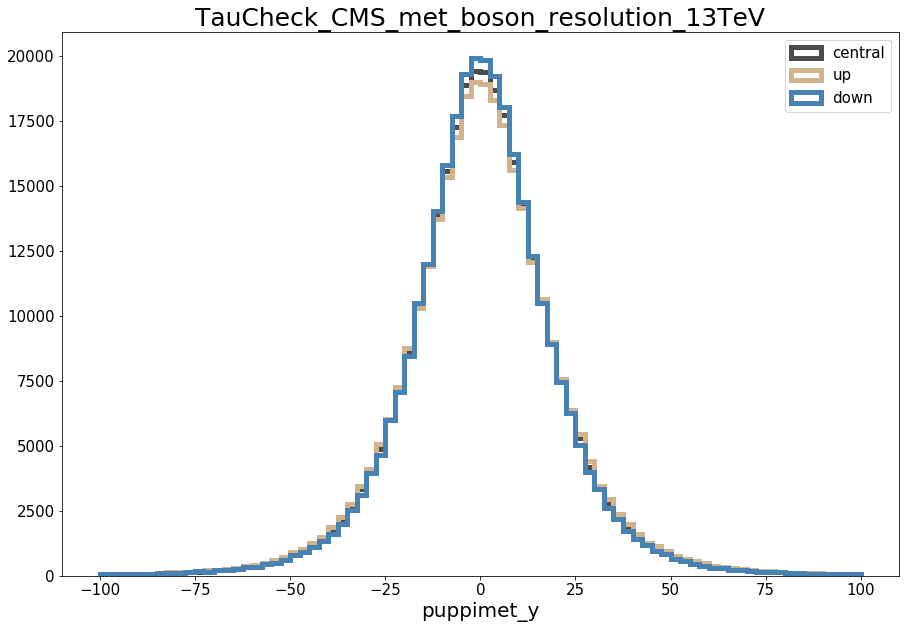

In [14]:
data['puppimet_x'] = data.puppimet * np.cos(data.puppimetphi)
data['puppimet_y'] = data.puppimet * np.sin(data.puppimetphi)
data_up['puppimet_x'] = data_up.puppimet * np.cos(data_up.puppimetphi)
data_up['puppimet_y'] = data_up.puppimet * np.sin(data_up.puppimetphi)
data_down['puppimet_x'] = data_down.puppimet * np.cos(data_down.puppimetphi)
data_down['puppimet_y'] = data_down.puppimet * np.sin(data_down.puppimetphi)

# cut_range = f'{var_name} >= {var_range[0]} & {var_name} <= {var_range[1]}' 
# cut = '1>0'

# data_cutted = data.query(f'{cut_range} & {cut}')
# data_up_cutted = data_up.query(f'{cut_range} & {cut}')
# data_down_cutted = data_down.query(f'{cut_range} & {cut}')

plot_shifts(data=data, data_up=data_up, data_down=data_down, var_name= var_name, var_range=var_range, nbins=nbins, systematic_tree_name=systematic_tree_name, out_plots_path=out_plots_path, close_plot=False)

In [15]:
print('Mean, Variance:\n')
print(f'central: {data[var_name].mean(), data[var_name].var()}')
print(f'up: {data_up[var_name].mean(), data_up[var_name].var()}')
print(f'down: {data_down[var_name].mean(), data_down[var_name].var()}')

Mean, Variance:

central: (0.30229136, 518.69965)
up: (0.31312186, 541.32635)
down: (0.29146078, 497.09912)


### puppimt_1

In [22]:
systematic_tree_name = 'TauCheck_CMS_met_boson_resolution_13TeV'
branches = ['puppimt_1', 'pt_tt']
var_range, nbins = ([0, 70], 70)
var_name = 'puppimt_1'

In [23]:
data_file = uproot.open(f'{path}/{file_name}')['TauCheck']
data_file_up = uproot.open(f'{path}/{file_name}')[f'{systematic_tree_name}Up']
data_file_down = uproot.open(f'{path}/{file_name}')[f'{systematic_tree_name}Down']

data = data_file.pandas.df(branches)
data_up = data_file_up.pandas.df(branches)
data_down = data_file_down.pandas.df(branches)

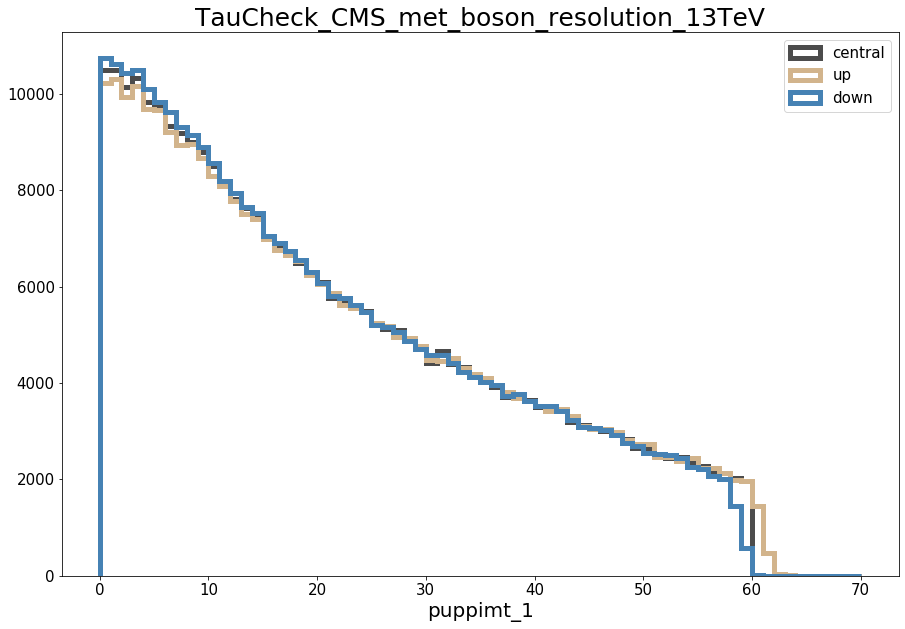

In [24]:
plot_shifts(data=data, data_up=data_up, data_down=data_down, var_name= var_name, var_range=var_range, nbins=nbins, systematic_tree_name=systematic_tree_name, out_plots_path=out_plots_path, close_plot=False, save_plot=False)

In [19]:
data.puppimt_1.max(), data_up.puppimt_1.max(), data_down.puppimt_1.max()

(59.999805, 69.410446, 63.085846)

In [20]:
data.puppimt_1.min(), data_up.puppimt_1.min(), data_down.puppimt_1.min()

(0.0001479921, 0.00016879127, 1.11038e-05)

In [30]:
sum(data_up.puppimt_1 > 61)

526

/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:34: RuntimeWarning: divide by zero encountered in true_divide
  ratio_up = norm_counts_up / norm_counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:35: RuntimeWarning: divide by zero encountered in true_divide
  ratio_down = norm_counts_down / norm_counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:35: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = norm_counts_down / norm_counts


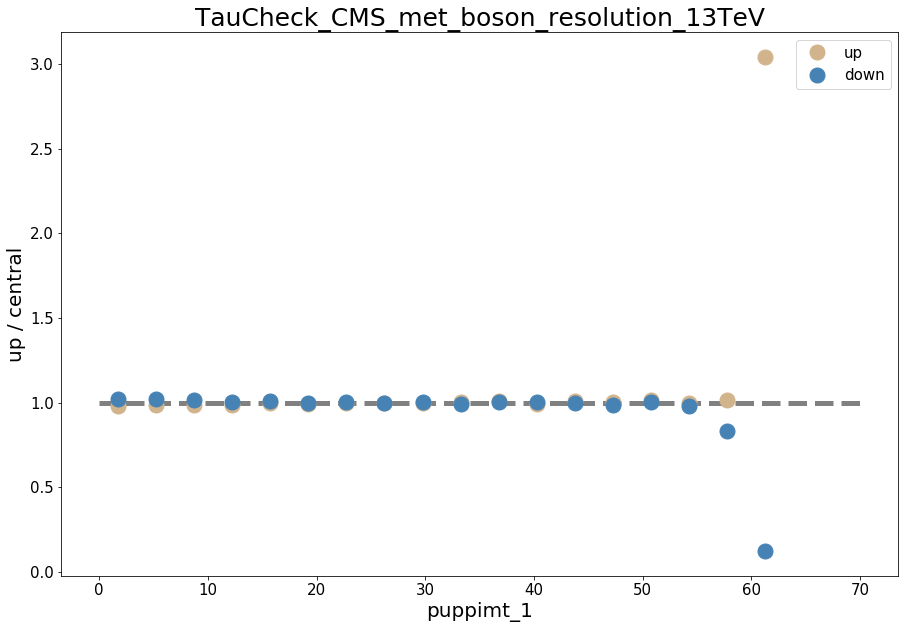

In [21]:
plot_ratio_shifts(data=data, data_up=data_up, data_down=data_down, var_name= var_name, var_range=var_range, nbins=nbins, systematic_tree_name=systematic_tree_name, out_plots_path=out_plots_path, save_plot=False, close_plot=False)

### DY

In [10]:
systematic_tree_name = 'TauCheck_CMS_shape_dyShape_13TeV'
branches = ['zptweight',]
var_range, nbins = ([-100, 100], 80)
var_name = 'zptweight'

In [11]:
data_file = uproot.open(f'{path}/{file_name}')['TauCheck']
data_file_up = uproot.open(f'{path}/{file_name}')[f'{systematic_tree_name}Up']
data_file_down = uproot.open(f'{path}/{file_name}')[f'{systematic_tree_name}Down']

data = data_file.pandas.df(branches)
data_up = data_file_up.pandas.df(branches)
data_down = data_file_down.pandas.df(branches)

In [12]:
np.unique(data_down.zptweight)

array([1.])